<a href="https://colab.research.google.com/github/EduardoPalma/ClusteringFood/blob/main/clustering_de_alimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Informacion nutricional de diversos alimentos, obtenidos de FoodDataCentral, proyecto personal orientado a la realizacion de clustering mediante  K-means, para ver similitudes de alimentos sin conocer.

In [150]:
import zipfile
import json
import pandas as pd

In [151]:
file = "/content/drive/MyDrive/alimentos/FoodData_Central_sr_legacy_food_json_2018-04.zip"

with zipfile.ZipFile(file, 'r') as zip_ref:
    directorio_destino = '/content/drive/MyDrive/alimentos/'
    zip_ref.extractall(directorio_destino)

In [152]:
with open('/content/drive/MyDrive/alimentos/FoodData_Central_sr_legacy_food_json_2021-10-28.json', 'r') as file:
    datos_json = json.load(file)

In [153]:
data_alimentos = datos_json['SRLegacyFoods']
print(len(data_alimentos))

7793


In [154]:
nombres_unicos_nutri = set()

for elemento in data_alimentos:
    lista_nutrientes = elemento['foodNutrients']

    for diccionario in lista_nutrientes:
      nombre = diccionario['nutrient']['name']
      nombres_unicos_nutri.add(nombre)

nombres_nutrientes = list(nombres_unicos_nutri)
print(nombres_nutrientes)

['MUFA 22:1 c', 'Fatty acids, total saturated', 'Fluoride, F', 'Ash', 'Thiamin', 'Total lipid (fat)', 'Vitamin D3 (cholecalciferol)', 'Proline', 'Riboflavin', 'Zinc, Zn', 'Glucose', 'Tocotrienol, gamma', 'Valine', 'Retinol', 'Selenium, Se', 'Leucine', 'SFA 24:0', 'Vitamin E (alpha-tocopherol)', 'Alcohol, ethyl', 'PUFA 2:4 n-6', 'Vitamin B-12', 'Lysine', 'PUFA 20:3 n-6', 'Glutamic acid', 'Fatty acids, total monounsaturated', 'Vitamin A, IU', 'Cystine', 'MUFA 14:1', 'MUFA 18:1-11 t (18:1t n-7)', 'Glycine', 'TFA 22:1 t', 'Folate, total', 'TFA 18:2 t not further defined', 'Vitamin A, RAE', 'Vitamin D (D2 + D3), International Units', 'Tocotrienol, delta', 'SFA 8:0', 'Betaine', 'PUFA 18:2 i', 'PUFA 2:5 n-3 (EPA)', 'Phosphorus, P', 'Carbohydrate, by difference', 'SFA 20:0', 'Cryptoxanthin, beta', 'Alanine', 'PUFA 18:2', 'Vitamin E, added', 'Folate, DFE', 'Histidine', 'Aspartic acid', 'Phenylalanine', 'Serine', 'Folic acid', 'Fatty acids, total trans-monoenoic', 'SFA 18:0', 'Theobromine', 'MUF

In [155]:
nombres_nutrientes.append("description")
df_alimentos_ = pd.DataFrame(columns=nombres_nutrientes)
print(df_alimentos_)

Empty DataFrame
Columns: [MUFA 22:1 c, Fatty acids, total saturated, Fluoride, F, Ash, Thiamin, Total lipid (fat), Vitamin D3 (cholecalciferol), Proline, Riboflavin, Zinc, Zn, Glucose, Tocotrienol, gamma, Valine, Retinol, Selenium, Se, Leucine, SFA 24:0, Vitamin E (alpha-tocopherol), Alcohol, ethyl, PUFA 2:4 n-6, Vitamin B-12, Lysine, PUFA 20:3 n-6, Glutamic acid, Fatty acids, total monounsaturated, Vitamin A, IU, Cystine, MUFA 14:1, MUFA 18:1-11 t (18:1t n-7), Glycine, TFA 22:1 t, Folate, total, TFA 18:2 t not further defined, Vitamin A, RAE, Vitamin D (D2 + D3), International Units, Tocotrienol, delta, SFA 8:0, Betaine, PUFA 18:2 i, PUFA 2:5 n-3 (EPA), Phosphorus, P, Carbohydrate, by difference, SFA 20:0, Cryptoxanthin, beta, Alanine, PUFA 18:2, Vitamin E, added, Folate, DFE, Histidine, Aspartic acid, Phenylalanine, Serine, Folic acid, Fatty acids, total trans-monoenoic, SFA 18:0, Theobromine, MUFA 24:1 c, Tocopherol, gamma, PUFA 18:3 n-6 c,c,c, Campesterol, MUFA 16:1, Tocopherol, be

In [156]:
def valores_vacios(df_nuevo):
  for nombre in nombres_nutrientes:
    if nombre not in df_nuevo:
      df_nuevo[nombre] = 0


In [157]:
for elemento in data_alimentos:
  nombre_alimento = elemento['description']
  lista_nutrientes = elemento['foodNutrients']

  df_nuevo = {}
  df_nuevo['description'] = nombre_alimento


  for nutrientes in lista_nutrientes:
      nombre = nutrientes['nutrient']['name']
      cantidad = nutrientes['amount']
      df_nuevo[nombre] = cantidad

  valores_vacios(df_nuevo)
  df_nuevo_concat = pd.DataFrame(df_nuevo, index=[1])
  df_alimentos_ = pd.concat([df_alimentos_, df_nuevo_concat], ignore_index=True)

In [158]:
print(len(df_alimentos_))

7793


In [159]:
df_alimentos = df_alimentos_.drop(columns=['description'])
df_alimentos = df_alimentos.astype(float)
df_alimentos.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 148 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    MUFA 22:1 c                               float64
 1    Fatty acids, total saturated              float64
 2    Fluoride, F                               float64
 3    Ash                                       float64
 4    Thiamin                                   float64
 5    Total lipid (fat)                         float64
 6    Vitamin D3 (cholecalciferol)              float64
 7    Proline                                   float64
 8    Riboflavin                                float64
 9    Zinc, Zn                                  float64
 10   Glucose                                   float64
 11   Tocotrienol, gamma                        float64
 12   Valine                                    float64
 13   Retinol                                   floa

In [160]:
df_alimentos.head()

,MUFA 22:1 c,"Fatty acids, total saturated","Fluoride, F",Ash,Thiamin,Total lipid (fat),Vitamin D3 (cholecalciferol),Proline,Riboflavin,"Zinc, Zn",...,SFA 6:0,MUFA 22:1,Water,PUFA 20:4,"Folate, food","Tocotrienol, beta",SFA 15:0,"Manganese, Mn","Sodium, Na",MUFA 15:1
0,0.0,2.940,0.0,3.50,0.000,13.20,0.0,0.000,0.000,0.00,...,0.000,0.0,35.5,0.000,0.0,0.0,0.0,0.000,1060.0,0.0
1,0.0,3.250,0.0,3.08,0.000,11.30,0.0,0.000,0.000,0.00,...,0.000,0.0,27.9,0.000,0.0,0.0,0.0,0.000,780.0,0.0
2,0.0,0.000,0.0,7.20,0.000,3.70,0.0,0.000,0.000,0.00,...,0.000,0.0,3.2,0.000,0.0,0.0,0.0,0.000,2180.0,0.0
3,0.0,0.308,0.0,1.60,0.000,1.80,0.0,0.000,0.000,0.00,...,0.000,0.0,42.6,0.000,0.0,0.0,0.0,0.000,345.0,0.0
4,0.0,1.900,0.0,2.81,0.499,9.22,0.0,0.559,0.665,0.48,...,0.003,0.0,40.3,0.009,14.0,0.0,0.0,0.215,621.0,0.0


In [161]:
df_alimentos.describe()

,MUFA 22:1 c,"Fatty acids, total saturated","Fluoride, F",Ash,Thiamin,Total lipid (fat),Vitamin D3 (cholecalciferol),Proline,Riboflavin,"Zinc, Zn",...,SFA 6:0,MUFA 22:1,Water,PUFA 20:4,"Folate, food","Tocotrienol, beta",SFA 15:0,"Manganese, Mn","Sodium, Na",MUFA 15:1
count,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,...,7793.000000,7793.000000,7793.00000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000
mean,0.000734,3.483079,1.975670,1.736841,0.179074,10.687078,0.202759,0.501280,0.221103,1.993679,...,0.012555,0.021072,56.03375,0.027512,21.519825,0.011088,0.007360,0.481975,288.870525,0.001107
std,0.013436,6.647500,13.981011,3.067865,0.431404,16.381762,1.269005,0.614304,0.415421,3.197997,...,0.070550,0.558719,29.49114,0.066205,59.449063,0.092370,0.029707,4.635404,987.333203,0.016488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.116000,0.000000,0.800000,0.030000,0.800000,0.000000,0.000000,0.050000,0.260000,...,0.000000,0.000000,38.10000,0.000000,1.000000,0.000000,0.000000,0.009000,29.000000,0.000000
50%,0.000000,1.470000,0.000000,1.150000,0.073000,5.060000,0.000000,0.272000,0.149000,0.920000,...,0.000000,0.000000,64.20000,0.000000,7.000000,0.000000,0.000000,0.033000,73.000000,0.000000
75%,0.000000,4.210000,0.000000,1.990000,0.180000,13.500000,0.000000,0.927000,0.251000,2.860000,...,0.000000,0.000000,78.00000,0.037000,19.000000,0.000000,0.000000,0.255000,344.000000,0.000000
max,1.060000,95.600000,584.000000,99.800000,23.400000,100.000000,27.400000,12.300000,17.500000,91.000000,...,2.010000,41.200000,100.00000,1.760000,2340.000000,2.790000,0.801000,269.000000,38800.000000,0.721000


In [162]:
alimentos_normalizados = (df_alimentos - df_alimentos.min())/(df_alimentos.max() - df_alimentos.min())
alimentos_normalizados

,MUFA 22:1 c,"Fatty acids, total saturated","Fluoride, F",Ash,Thiamin,Total lipid (fat),Vitamin D3 (cholecalciferol),Proline,Riboflavin,"Zinc, Zn",...,SFA 6:0,MUFA 22:1,Water,PUFA 20:4,"Folate, food","Tocotrienol, beta",SFA 15:0,"Manganese, Mn","Sodium, Na",MUFA 15:1
0,0.0,0.030753,0.0,0.035070,0.000000,0.1320,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.355,0.000000,0.000000,0.0,0.0,0.000000,0.027320,0.0
1,0.0,0.033996,0.0,0.030862,0.000000,0.1130,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.279,0.000000,0.000000,0.0,0.0,0.000000,0.020103,0.0
2,0.0,0.000000,0.0,0.072144,0.000000,0.0370,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.032,0.000000,0.000000,0.0,0.0,0.000000,0.056186,0.0
3,0.0,0.003222,0.0,0.016032,0.000000,0.0180,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.426,0.000000,0.000000,0.0,0.0,0.000000,0.008892,0.0
4,0.0,0.019874,0.0,0.028156,0.021325,0.0922,0.0,0.045447,0.038000,0.005275,...,0.001493,0.0,0.403,0.005114,0.005983,0.0,0.0,0.000799,0.016005,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7788,0.0,0.006276,0.0,0.013928,0.001282,0.0180,0.0,0.083740,0.014286,0.027912,...,0.000000,0.0,0.688,0.056818,0.003846,0.0,0.0,0.000000,0.001443,0.0
7789,0.0,0.005544,0.0,0.010020,0.000000,0.0145,0.0,0.080650,0.000000,0.026374,...,0.000000,0.0,0.744,0.051136,0.000000,0.0,0.0,0.000045,0.001495,0.0
7790,0.0,0.007322,0.0,0.013226,0.000000,0.0190,0.0,0.106504,0.000000,0.034725,...,0.000000,0.0,0.663,0.062500,0.003846,0.0,0.0,0.000048,0.001572,0.0
7791,0.0,0.007427,0.0,0.011122,0.004701,0.0231,0.0,0.000000,0.028000,0.043956,...,0.000000,0.0,0.758,0.034091,0.002137,0.0,0.0,0.000141,0.002113,0.0


In [163]:
alimentos_normalizados.describe()

,MUFA 22:1 c,"Fatty acids, total saturated","Fluoride, F",Ash,Thiamin,Total lipid (fat),Vitamin D3 (cholecalciferol),Proline,Riboflavin,"Zinc, Zn",...,SFA 6:0,MUFA 22:1,Water,PUFA 20:4,"Folate, food","Tocotrienol, beta",SFA 15:0,"Manganese, Mn","Sodium, Na",MUFA 15:1
count,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,...,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000
mean,0.000692,0.036434,0.003383,0.017403,0.007653,0.106871,0.007400,0.040754,0.012634,0.021909,...,0.006246,0.000511,0.560337,0.015632,0.009197,0.003974,0.009188,0.001792,0.007445,0.001536
std,0.012676,0.069535,0.023940,0.030740,0.018436,0.163818,0.046314,0.049943,0.023738,0.035143,...,0.035099,0.013561,0.294911,0.037617,0.025406,0.033107,0.037088,0.017232,0.025447,0.022868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.001213,0.000000,0.008016,0.001282,0.008000,0.000000,0.000000,0.002857,0.002857,...,0.000000,0.000000,0.381000,0.000000,0.000427,0.000000,0.000000,0.000033,0.000747,0.000000
50%,0.000000,0.015377,0.000000,0.011523,0.003120,0.050600,0.000000,0.022114,0.008514,0.010110,...,0.000000,0.000000,0.642000,0.000000,0.002991,0.000000,0.000000,0.000123,0.001881,0.000000
75%,0.000000,0.044038,0.000000,0.019940,0.007692,0.135000,0.000000,0.075366,0.014343,0.031429,...,0.000000,0.000000,0.780000,0.021023,0.008120,0.000000,0.000000,0.000948,0.008866,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Clustering de alimentos, agrupacion por valor nutricional

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [165]:
clusters = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, max_iter=300, n_init=4)
  kmeans.fit(alimentos_normalizados)
  clusters.append(kmeans.inertia_)



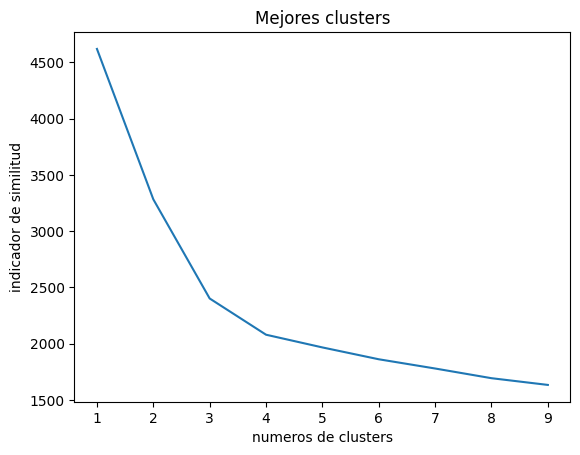

In [166]:
plt.plot(range(1,10), clusters)
plt.title("Mejores clusters")
plt.xlabel("numeros de clusters")
plt.ylabel("indicador de similitud")
plt.show()

# Aplicando el modelo
Numero de cluster a utilizar 4 ultimo indicador de eficiente dentro del modelo

In [172]:
clustering = KMeans(init="k-means++", n_clusters=4, n_init=4)
clustering.fit(alimentos_normalizados)

KMeans(n_clusters=4, n_init=4)

In [173]:
df_alimentos_['kmeans_label'] = clustering.labels_

In [174]:
df_alimentos_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Columns: 150 entries, MUFA 22:1 c to kmeans_label
dtypes: float64(12), int32(1), object(137)
memory usage: 8.9+ MB


In [180]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_alimentos = pca.fit_transform(alimentos_normalizados)
df_alimentos_component = pd.DataFrame(data = pca_alimentos, columns=["componente 1","componente 2","componente 3"])
df_alimentos_labels = pd.concat([df_alimentos_component, df_alimentos_[['kmeans_label']]], axis=1)

df_alimentos_labels

,componente 1,componente 2,componente 3,kmeans_label
0,-0.438416,0.062455,-0.064849,0
1,-0.524922,0.175132,-0.155262,0
2,-0.639137,0.415253,-0.305503,0
3,-0.426160,-0.006072,-0.149893,1
4,-0.274174,0.158325,-0.145567,0
...,...,...,...,...
7788,0.691548,0.001846,-0.158512,2
7789,0.566428,-0.106015,-0.121080,2
7790,0.793597,0.058847,-0.176499,2
7791,0.352704,-0.206882,-0.056486,2


# Visualizacion de los clusters

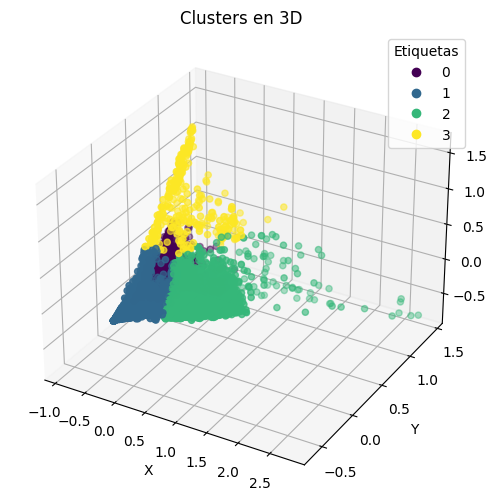

In [182]:
from mpl_toolkits.mplot3d import Axes3D

x = df_alimentos_labels['componente 1']
y = df_alimentos_labels['componente 2']
z = df_alimentos_labels['componente 3']
labels = df_alimentos_labels['kmeans_label']

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=labels, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Clusters en 3D')
ax.legend(*scatter.legend_elements(), title='Etiquetas')

# Mostrar el gráfico
plt.show()

*se realizar nuevamente una visualizacion pero con dimensionalidad 2 para ver el cluster faltante de color morado*

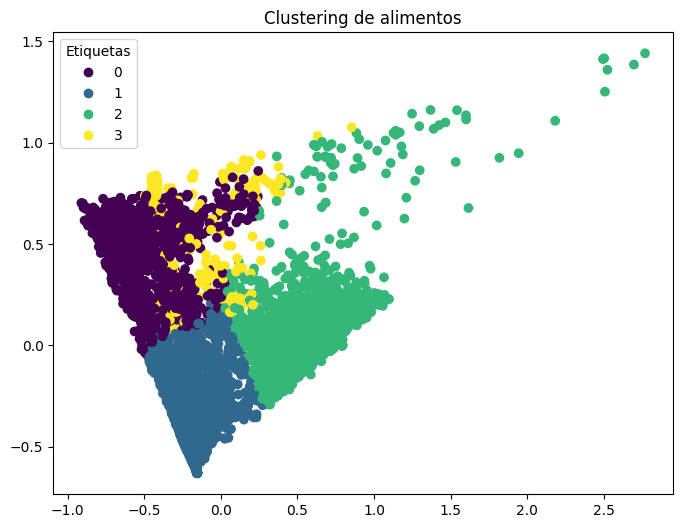

In [211]:
x = df_alimentos_labels['componente 1']
y = df_alimentos_labels['componente 2']
labels = df_alimentos_labels['kmeans_label']

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Clustering de alimentos")


scatter = ax.scatter(x=x, y=y, c=labels,cmap='viridis')

ax.legend(*scatter.legend_elements(), title='Etiquetas')

plt.show()

In [212]:
df_alimentos_labels.to_csv('/content/drive/MyDrive/alimentos/cluster.csv')
df_alimentos_.to_csv('/content/drive/MyDrive/alimentos/data_cluster.csv')